# CCSN Neutrino Luminosity

Test initialization of neutrino source luminosity.

In [2]:
%matplotlib inline

from ussr import config, source
from ussr.neutrino import Flavor

import astropy.units as u

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', size=16)

## Load Configuration

This will load the source configuration from a file.

For this to work, either the user needs to have done one of two things:
1. Run `python setup.py install` in the USSR directory.
2. Run `python setup.py develop` and set the environment variable `USSR` to point to the git source checkout.

If these were not done, the initialization will fail because the paths will not be correctly resolved.

In [3]:
conf = config.load_config('../../data/config/test.yaml')
ccsn = source.initialize(conf)

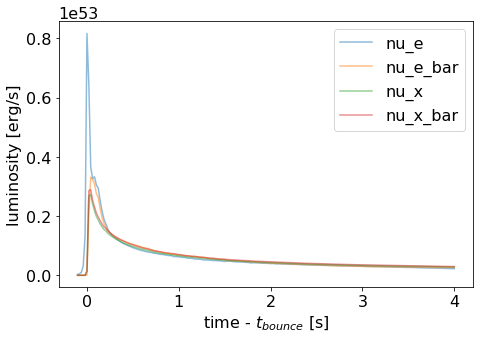

In [4]:
fig, ax = plt.subplots(1,1, figsize=(7,5))

t = np.linspace(-0.1, 4, 201) * u.s
for flavor in Flavor:
    lum = ccsn.get_luminosity(t, flavor)
    ax.plot(t, lum, label=flavor.name, alpha=0.5)
# plt.yscale('log')
# plt.ylim(3e51, 5e53)
ax.set(xlabel='time - $t_{bounce}$ [s]',
       ylabel='luminosity [erg/s]')
ax.legend()
fig.tight_layout()